### EXPLORATORY DATA ANALYSIS  with covid19india.org data 

#### Author: Debapratim Gupta ( https://www.linkedin.com/in/dgupta1234/ )

### Task to be Performed:

- **Analyze the present condition in India**

In [201]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import json
from pandas import json_normalize

import requests

import folium
from folium import plugins

### Task 2 : Analyzing the present condition in India

#### Fetching the data in json format

In [202]:
api = pd.read_json('https://corona-virus-stats.herokuapp.com/api/v1/cases/countries-search')

In [203]:
json_data = api['data']['rows']

In [204]:
data = json_normalize(json_data)
data

,country,country_abbreviation,total_cases,new_cases,total_deaths,new_deaths,total_recovered,active_cases,serious_critical,cases_per_mill_pop,flag
0,World,,"4,525,103","3,077","303,351",269,"1,703,742","2,518,010","45,560",581.0,https://upload.wikimedia.org/wikipedia/commons...
1,USA,US,"1,457,593",0,"86,912",0,"318,027","1,052,654","16,240","4,404.0",https://www.worldometers.info/img/flags/us-fla...
2,Spain,ES,"272,646",0,"27,321",0,"186,480","58,845","1,376","5,831.0",https://www.worldometers.info/img/flags/sp-fla...
3,Russia,RU,"252,245",0,"2,305",0,"53,530","196,410","2,300","1,728.0",https://www.worldometers.info/img/flags/rs-fla...
4,UK,GB,"233,151",0,"33,614",0,N/A,"199,193","1,559","3,434.0",https://www.worldometers.info/img/flags/uk-fla...
5,Italy,IT,"223,096",0,"31,368",0,"115,288","76,440",855,"3,690.0",https://www.worldometers.info/img/flags/it-fla...
6,Brazil,BR,"203,165",247,"13,999",6,"79,479","109,687","8,318",956.0,https://www.worldometers.info/img/flags/br-fla...
7,France,FR,"178,870",0,"27,425",0,"59,605","91,840","2,299","2,740.0",https://www.worldometers.info/img/flags/fr-fla...
8,Germany,DE,"174,975",0,"7,928",0,"150,300","16,747","1,329","2,088.0",https://www.worldometers.info/img/flags/gm-fla...
9,Turkey,TR,"144,749",0,"4,007",0,"104,030","36,712",963,"1,716.0",https://www.worldometers.info/img/flags/tu-fla...


In [205]:
response = requests.get('https://api.covid19india.org/data.json')
content = response.content
parsed = json.loads(content)
parsed.keys()

dict_keys(['cases_time_series', 'statewise', 'tested'])

#### Viewing the dataframe

In [206]:
state_level = pd.DataFrame(parsed['statewise'])
state_level

,active,confirmed,deaths,deltaconfirmed,deltadeaths,deltarecovered,lastupdatedtime,migratedother,recovered,state,statecode,statenotes
0,231335,11438464,159079,28869,187,17746,16/3/2021 22:58:41,4673,11043377,Total,TT,
1,138813,2347328,52996,17864,87,9510,16/03/2021 21:50:48,1266,2154253,Maharashtra,MH,"[Dec 16]:10,218 duplicate cases & other state ..."
2,26124,1094295,4423,1970,15,2884,16/03/2021 19:36:51,304,1063444,Kerala,KL,Mahe native who expired in Kannur included in ...
3,9428,962339,12403,1135,6,561,16/03/2021 20:48:51,19,940489,Karnataka,KA,
4,1579,892269,7185,261,0,125,16/03/2021 18:41:41,0,883505,Andhra Pradesh,AP,
5,5450,861429,12556,867,5,561,16/03/2021 21:07:46,0,843423,Tamil Nadu,TN,[July 22]: 444 backdated deceased entries adde...
6,2488,644489,10945,425,1,257,16/03/2021 18:41:43,0,631056,Delhi,DL,[July 14]: Value for the total tests conducted...
7,1912,605655,8750,214,2,138,16/03/2021 21:20:57,0,594993,Uttar Pradesh,UP,[Jan 1]:As no bulletin was provided for 31'st ...
8,3158,578853,10297,255,2,242,16/03/2021 21:07:49,0,565398,West Bengal,WB,
9,556,338323,1971,65,0,66,16/03/2021 21:07:50,0,335796,Odisha,OR,[July 12th] :20 non-covid deaths reported in s...


#### India Case Count

In [207]:
# Temporarily dropping the unwanted columns
india_data = state_level.drop(['deltaconfirmed','deltadeaths','deltarecovered','lastupdatedtime',
                              'state','statecode','statenotes',],axis=1)

In [208]:
# Get the information on the current dataframe
india_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   active         38 non-null     object
 1   confirmed      38 non-null     object
 2   deaths         38 non-null     object
 3   migratedother  38 non-null     object
 4   recovered      38 non-null     object
dtypes: object(5)
memory usage: 1.6+ KB


In [209]:
# Convert the datatypes of all the columns to numeric
india_data = india_data.apply(pd.to_numeric)
# Summing up the total, converting pandas Series to dataframe and changing its orientation
india_summary = pd.DataFrame(india_data[1:].sum()).transpose()
# Styling the numeric float data into integral data
india_summary.style.format("{:,.0f}")

,active,confirmed,deaths,migratedother,recovered
0,"231,335","11,438,464","159,079","4,673","11,043,377"


In [210]:
# re-arranging the columns 
state_level = state_level[['state','statecode','confirmed','active','recovered','deaths',
                           'migratedother','deltaconfirmed','deltarecovered','deltadeaths',
                           'lastupdatedtime','statenotes']]
state_level[1:]

,state,statecode,confirmed,active,recovered,deaths,migratedother,deltaconfirmed,deltarecovered,deltadeaths,lastupdatedtime,statenotes
1,Maharashtra,MH,2347328,138813,2154253,52996,1266,17864,9510,87,16/03/2021 21:50:48,"[Dec 16]:10,218 duplicate cases & other state ..."
2,Kerala,KL,1094295,26124,1063444,4423,304,1970,2884,15,16/03/2021 19:36:51,Mahe native who expired in Kannur included in ...
3,Karnataka,KA,962339,9428,940489,12403,19,1135,561,6,16/03/2021 20:48:51,
4,Andhra Pradesh,AP,892269,1579,883505,7185,0,261,125,0,16/03/2021 18:41:41,
5,Tamil Nadu,TN,861429,5450,843423,12556,0,867,561,5,16/03/2021 21:07:46,[July 22]: 444 backdated deceased entries adde...
6,Delhi,DL,644489,2488,631056,10945,0,425,257,1,16/03/2021 18:41:43,[July 14]: Value for the total tests conducted...
7,Uttar Pradesh,UP,605655,1912,594993,8750,0,214,138,2,16/03/2021 21:20:57,[Jan 1]:As no bulletin was provided for 31'st ...
8,West Bengal,WB,578853,3158,565398,10297,0,255,242,2,16/03/2021 21:07:49,
9,Odisha,OR,338323,556,335796,1971,0,65,66,0,16/03/2021 21:07:50,[July 12th] :20 non-covid deaths reported in s...
10,Rajasthan,RJ,323461,2661,318009,2791,0,241,151,1,16/03/2021 20:33:06,


In [211]:
#Checking the dataframe information
state_level.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   state            38 non-null     object
 1   statecode        38 non-null     object
 2   confirmed        38 non-null     object
 3   active           38 non-null     object
 4   recovered        38 non-null     object
 5   deaths           38 non-null     object
 6   migratedother    38 non-null     object
 7   deltaconfirmed   38 non-null     object
 8   deltarecovered   38 non-null     object
 9   deltadeaths      38 non-null     object
 10  lastupdatedtime  38 non-null     object
 11  statenotes       38 non-null     object
dtypes: object(12)
memory usage: 3.7+ KB


#### For State-level drill down

In [212]:
state_level[['confirmed','active','recovered','deaths',
            'migratedother','deltaconfirmed',
            'deltarecovered','deltadeaths']] = state_level[['confirmed','active','recovered','deaths',
                                                            'migratedother','deltaconfirmed',
                                                            'deltarecovered','deltadeaths']].apply(pd.to_numeric)
state_level.drop(['lastupdatedtime','statenotes'],axis =1)[1:].sort_values(
    'confirmed', ascending= False).reset_index(drop=True).style.bar(align="left",width=98,color='#d65f5f')

,state,statecode,confirmed,active,recovered,deaths,migratedother,deltaconfirmed,deltarecovered,deltadeaths
0,Maharashtra,MH,2347328,138813,2154253,52996,1266,17864,9510,87
1,Kerala,KL,1094295,26124,1063444,4423,304,1970,2884,15
2,Karnataka,KA,962339,9428,940489,12403,19,1135,561,6
3,Andhra Pradesh,AP,892269,1579,883505,7185,0,261,125,0
4,Tamil Nadu,TN,861429,5450,843423,12556,0,867,561,5
5,Delhi,DL,644489,2488,631056,10945,0,425,257,1
6,Uttar Pradesh,UP,605655,1912,594993,8750,0,214,138,2
7,West Bengal,WB,578853,3158,565398,10297,0,255,242,2
8,Odisha,OR,338323,556,335796,1971,0,65,66,0
9,Rajasthan,RJ,323461,2661,318009,2791,0,241,151,1


#### Visualizing : COVID-19 Cases in India

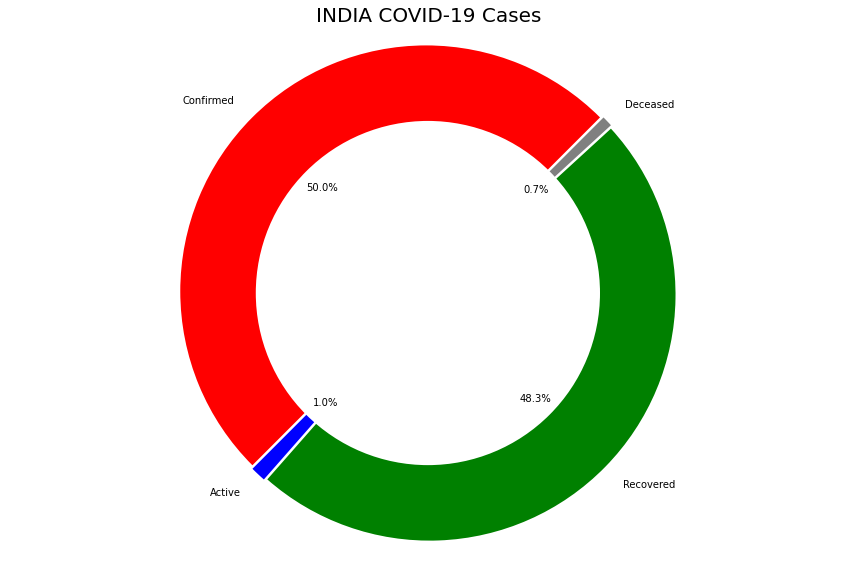

In [213]:
india_confirmed = india_summary['confirmed'].to_numpy()
india_recovered = india_summary['recovered'].to_numpy()
india_deaths = india_summary['deaths'].to_numpy()
india_active = india_summary['active'].to_numpy()

labels = ['Confirmed','Active','Recovered','Deceased']
size = [india_confirmed,india_active,india_recovered,india_deaths]
sizes = np.asarray(size)
color= ['red','blue','green','gray']
explode = []

for i in labels:
    explode.append(0.01)
    
plt.figure(figsize= (12,8))
plt.pie(sizes.flatten(), labels=labels, autopct='%1.1f%%', startangle=45, explode = explode,colors = color)
centre_circle = plt.Circle((0,0),0.70,fc='white')

fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('INDIA COVID-19 Cases',fontsize = 20)
plt.axis('equal')  
plt.tight_layout()

In [214]:
# renaming the columns
state_level = state_level.rename(columns={'state':'State','statecode':'State Code','confirmed':'Confirmed',
                                         'active':'Active','recovered':'Recovered','deaths':'Deaths',
                                         'migratedother':'Migrated/Other','deltaconfirmed':'Delta Confirmed',
                                         'deltarecovered':'Delta Recovered','deltadeaths':'Delta Deaths',
                                         'lastupdatedtime':'Last Updated Time','statenotes':'State Notes'})
state_level

,State,State Code,Confirmed,Active,Recovered,Deaths,Migrated/Other,Delta Confirmed,Delta Recovered,Delta Deaths,Last Updated Time,State Notes
0,Total,TT,11438464,231335,11043377,159079,4673,28869,17746,187,16/3/2021 22:58:41,
1,Maharashtra,MH,2347328,138813,2154253,52996,1266,17864,9510,87,16/03/2021 21:50:48,"[Dec 16]:10,218 duplicate cases & other state ..."
2,Kerala,KL,1094295,26124,1063444,4423,304,1970,2884,15,16/03/2021 19:36:51,Mahe native who expired in Kannur included in ...
3,Karnataka,KA,962339,9428,940489,12403,19,1135,561,6,16/03/2021 20:48:51,
4,Andhra Pradesh,AP,892269,1579,883505,7185,0,261,125,0,16/03/2021 18:41:41,
5,Tamil Nadu,TN,861429,5450,843423,12556,0,867,561,5,16/03/2021 21:07:46,[July 22]: 444 backdated deceased entries adde...
6,Delhi,DL,644489,2488,631056,10945,0,425,257,1,16/03/2021 18:41:43,[July 14]: Value for the total tests conducted...
7,Uttar Pradesh,UP,605655,1912,594993,8750,0,214,138,2,16/03/2021 21:20:57,[Jan 1]:As no bulletin was provided for 31'st ...
8,West Bengal,WB,578853,3158,565398,10297,0,255,242,2,16/03/2021 21:07:49,
9,Odisha,OR,338323,556,335796,1971,0,65,66,0,16/03/2021 21:07:50,[July 12th] :20 non-covid deaths reported in s...


In [215]:
# columns
state_level.columns

Index(['State', 'State Code', 'Confirmed', 'Active', 'Recovered', 'Deaths',
       'Migrated/Other', 'Delta Confirmed', 'Delta Recovered', 'Delta Deaths',
       'Last Updated Time', 'State Notes'],
      dtype='object')

In [216]:
# unique state names
state_level['State'].unique()

array(['Total', 'Maharashtra', 'Kerala', 'Karnataka', 'Andhra Pradesh',
       'Tamil Nadu', 'Delhi', 'Uttar Pradesh', 'West Bengal', 'Odisha',
       'Rajasthan', 'Chhattisgarh', 'Telangana', 'Haryana', 'Gujarat',
       'Bihar', 'Madhya Pradesh', 'Assam', 'Punjab', 'Jammu and Kashmir',
       'Jharkhand', 'Uttarakhand', 'Himachal Pradesh', 'Goa',
       'Puducherry', 'Tripura', 'Manipur', 'Chandigarh',
       'Arunachal Pradesh', 'Meghalaya', 'Nagaland', 'Ladakh', 'Sikkim',
       'Andaman and Nicobar Islands', 'Mizoram',
       'Dadra and Nagar Haveli and Daman and Diu', 'Lakshadweep',
       'State Unassigned'], dtype=object)

In [217]:
# number of missing values 
state_level.isna().sum()

State                0
State Code           0
Confirmed            0
Active               0
Recovered            0
Deaths               0
Migrated/Other       0
Delta Confirmed      0
Delta Recovered      0
Delta Deaths         0
Last Updated Time    0
State Notes          0
dtype: int64

In [218]:
# number of unique values 
state_level.nunique()

State                38
State Code           38
Confirmed            38
Active               38
Recovered            38
Deaths               38
Migrated/Other       14
Delta Confirmed      33
Delta Recovered      31
Delta Deaths         11
Last Updated Time    38
State Notes          15
dtype: int64

In [219]:
# Dataframe information
state_level.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   State              38 non-null     object
 1   State Code         38 non-null     object
 2   Confirmed          38 non-null     int64 
 3   Active             38 non-null     int64 
 4   Recovered          38 non-null     int64 
 5   Deaths             38 non-null     int64 
 6   Migrated/Other     38 non-null     int64 
 7   Delta Confirmed    38 non-null     int64 
 8   Delta Recovered    38 non-null     int64 
 9   Delta Deaths       38 non-null     int64 
 10  Last Updated Time  38 non-null     object
 11  State Notes        38 non-null     object
dtypes: int64(8), object(4)
memory usage: 3.7+ KB


In [220]:
total_cases = state_level['Confirmed'][1:].sum()
print('Total number of confirmed COVID 2019 cases across India till date:', total_cases)

Total number of confirmed COVID 2019 cases across India till date: 11438464


In [221]:
# highlighting the dataframe with gradient
df_temp = state_level.drop(['State Code','Last Updated Time', 'State Notes'], axis = 1)[1:] #Removing Date, Latitude and Longitude and other extra columns
df_temp.style.background_gradient(cmap='Reds')

,State,Confirmed,Active,Recovered,Deaths,Migrated/Other,Delta Confirmed,Delta Recovered,Delta Deaths
1,Maharashtra,2347328,138813,2154253,52996,1266,17864,9510,87
2,Kerala,1094295,26124,1063444,4423,304,1970,2884,15
3,Karnataka,962339,9428,940489,12403,19,1135,561,6
4,Andhra Pradesh,892269,1579,883505,7185,0,261,125,0
5,Tamil Nadu,861429,5450,843423,12556,0,867,561,5
6,Delhi,644489,2488,631056,10945,0,425,257,1
7,Uttar Pradesh,605655,1912,594993,8750,0,214,138,2
8,West Bengal,578853,3158,565398,10297,0,255,242,2
9,Odisha,338323,556,335796,1971,0,65,66,0
10,Rajasthan,323461,2661,318009,2791,0,241,151,1


#### Mapping the active cases in India on folium world-map

In [224]:
# latitude and longitude information
# ==================================

# latitude of the states
lat = {'Delhi':28.7041, 'Haryana':29.0588, 'Kerala':10.8505, 'Rajasthan':27.0238,
       'Telangana':18.1124, 'Uttar Pradesh':26.8467, 'Ladakh':34.2996, 'Tamil Nadu':11.1271,
       'Jammu and Kashmir':33.7782, 'Punjab':31.1471, 'Karnataka':15.3173, 'Maharashtra':19.7515,
       'Andhra Pradesh':15.9129, 'Odisha':20.9517, 'Uttarakhand':30.0668, 'West Bengal':22.9868, 
       'Puducherry': 11.9416, 'Chandigarh': 30.7333, 'Chhattisgarh':21.2787, 'Gujarat': 22.2587, 
       'Himachal Pradesh': 31.1048, 'Madhya Pradesh': 22.9734, 'Bihar': 25.0961, 'Manipur':24.6637, 
       'Mizoram':23.1645, 'Goa': 15.2993, 'Andaman and Nicobar Islands': 11.7401, 'Assam' : 26.2006, 
       'Jharkhand': 23.6102, 'Arunachal Pradesh': 28.2180, 'Tripura': 23.9408, 'Nagaland': 26.1584, 
       'Meghalaya' : 25.4670, 'Dadar Nagar Haveli' : 20.1809, 'Sikkim': 27.5330, 'Lakshadweep': 10.3280}

# longitude of the states
long = {'Delhi':77.1025, 'Haryana':76.0856, 'Kerala':76.2711, 'Rajasthan':74.2179,
        'Telangana':79.0193, 'Uttar Pradesh':80.9462, 'Ladakh':78.2932, 'Tamil Nadu':78.6569,
        'Jammu and Kashmir':76.5762, 'Punjab':75.3412, 'Karnataka':75.7139, 'Maharashtra':75.7139,
        'Andhra Pradesh':79.7400, 'Odisha':85.0985, 'Uttarakhand':79.0193, 'West Bengal':87.8550, 
        'Puducherry': 79.8083, 'Chandigarh': 76.7794, 'Chhattisgarh':81.8661, 'Gujarat': 71.1924, 
        'Himachal Pradesh': 77.1734, 'Madhya Pradesh': 78.6569, 'Bihar': 85.3131, 'Manipur':93.9063, 
        'Mizoram':92.9376, 'Goa': 74.1240, 'Andaman and Nicobar Islands': 92.6586, 'Assam' : 92.9376, 
        'Jharkhand': 85.2799, 'Arunachal Pradesh': 94.7278, 'Tripura': 91.9882, 'Nagaland': 94.5624,
        'Meghalaya' : 91.3662, 'Dadar Nagar Haveli' : 73.0169, 'Sikkim': 88.5122, 'Lakshadweep': 72.7846}

# add latitude column based on 'State' column
state_level['Latitude'] = state_level['State'].map(lat)

# add longitude column based on 'State' column
state_level['Longitude'] = state_level['State'].map(long)

normalized_active =(state_level['Active'][1:].max()-state_level['Active'][1:].min())
mean_active = state_level['Active'][1:].mean()

india_map = state_level.dropna()

# Using folium to create a zoomable map
map = folium.Map(location=[19, 80], zoom_start=4,tiles='Stamenterrain') 
title_html = '<h3 align="center" style="font-size:16px">COVID-19 ACTIVE CASES IN INDIA</h3>'

for lat, lon, value, name in zip(india_map['Latitude'], india_map['Longitude'], india_map['Active'], india_map['State']):
    folium.CircleMarker([lat, lon], radius=((value-mean_active)/normalized_active)*50, 
                        popup = ('<strong>State</strong>: ' + str(name).title() + '<br>''<strong>Total Cases</strong>: ' + str(value) + '<br>'),color='#007bff',fill_color='#007bff',fill_opacity=0.3 ).add_to(map)
map.get_root().html.add_child(folium.Element(title_html))
map